In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
churn = pd.read_csv("data/churn.csv")
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])
churn['signup_date'] = pd.to_datetime(churn['signup_date'])
churn['churn'] = churn['last_trip_date'] > '2014-06-01'
churn = pd.concat([churn, pd.get_dummies(churn.phone, prefix='phone', drop_first=True)], axis=1)
churn = pd.concat([churn, pd.get_dummies(churn.city, prefix='city', drop_first=True)], axis=1)
churn = pd.concat([churn, pd.get_dummies(churn.luxury_car_user, prefix='luxury', drop_first=True)], axis=1)
churn.drop(['phone', 'city', 'luxury_car_user'], axis  =1, inplace = True)
churn[['avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'trips_in_first_30_days', 'churn'
      ]] = churn[['avg_rating_by_driver', 'avg_rating_of_driver', 
                  'avg_surge', 'trips_in_first_30_days', 'churn']].astype(np.float32)
churn['avg_rating_by_driver'] = churn['avg_rating_by_driver'].fillna(churn['avg_rating_by_driver'].mean())
churn['avg_rating_of_driver'] = churn['avg_rating_of_driver'].fillna(churn['avg_rating_of_driver'].mean())

In [3]:
print(churn['last_trip_date'].max(), churn['last_trip_date'].min())

(Timestamp('2014-07-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))


In [4]:
churn['churn'] = churn['last_trip_date'] > '2014-06-01'

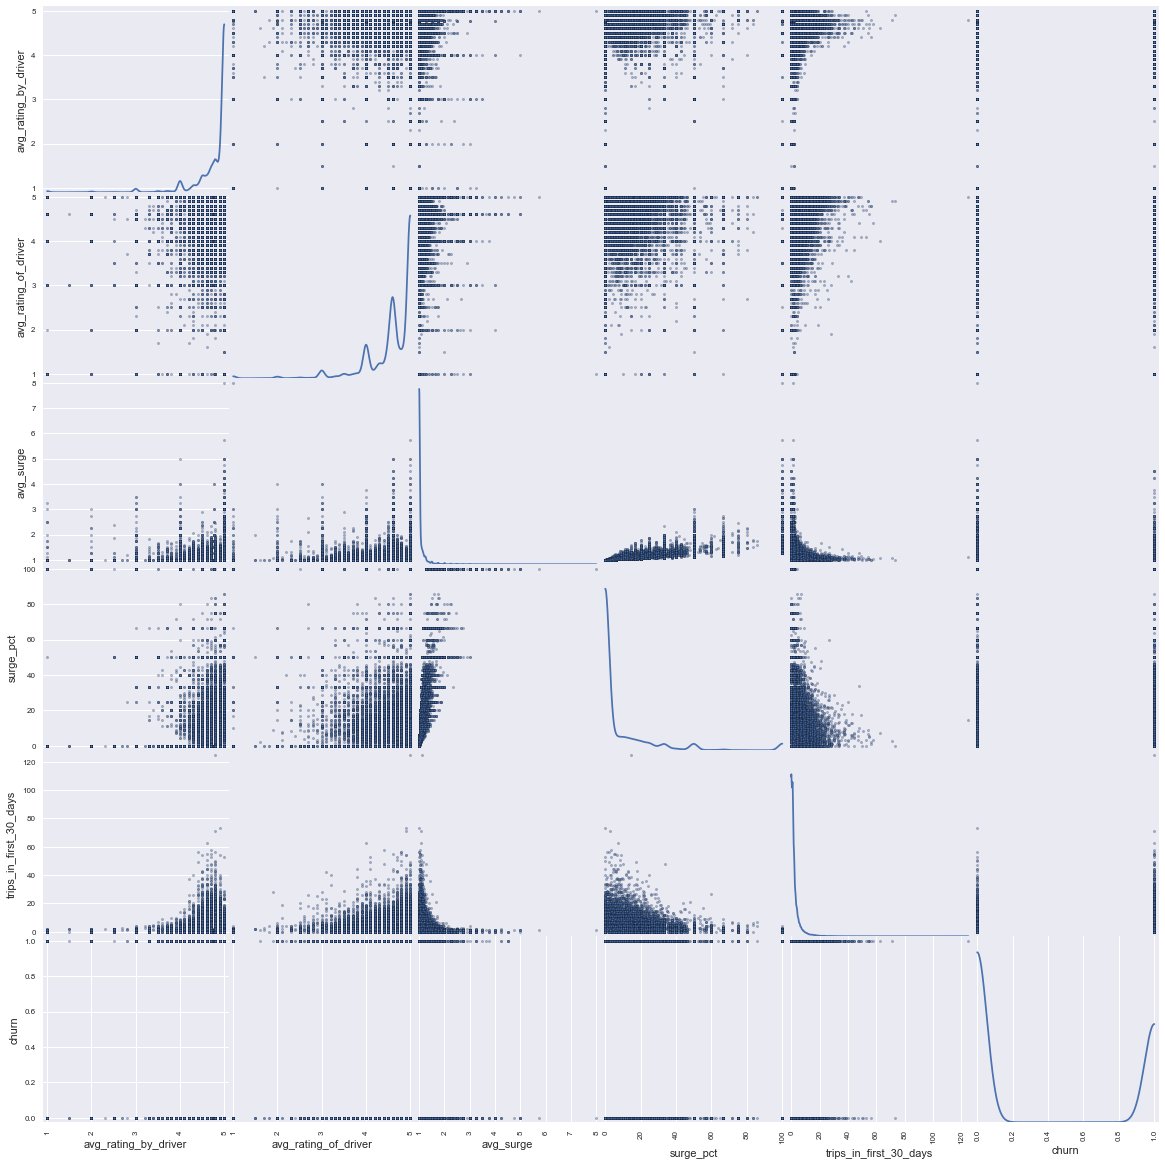

In [10]:
var = ['avg_rating_by_driver', 'avg_rating_of_driver','avg_surge','surge_pct', 'trips_in_first_30_days','churn']
pd.scatter_matrix(churn[var], figsize=(20,20), diagonal='kde');

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float32
avg_rating_of_driver      50000 non-null float32
avg_surge                 50000 non-null float32
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null float32
weekday_pct               50000 non-null float64
churn                     50000 non-null bool
phone_iPhone              50000 non-null float64
city_King's Landing       50000 non-null float64
city_Winterfell           50000 non-null float64
luxury_True               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float32(4), float64(7)
memory usage: 4.2 MB


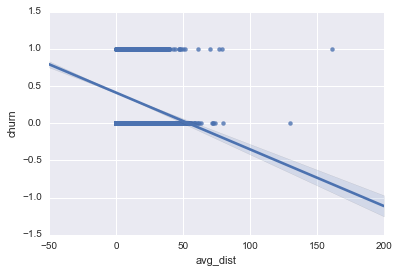

In [7]:
sns.regplot(churn['avg_dist'], churn['churn'])

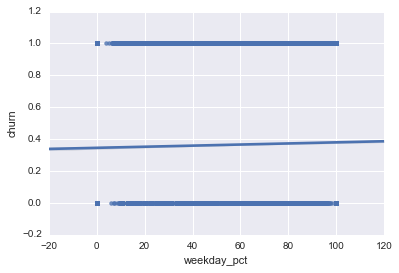

In [8]:
sns.regplot(churn['weekday_pct'], churn['churn'])

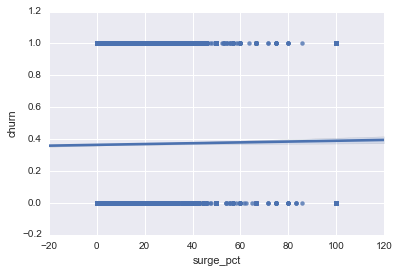

In [9]:
sns.regplot(churn['surge_pct'], churn['churn'])

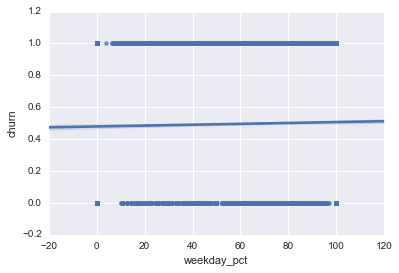

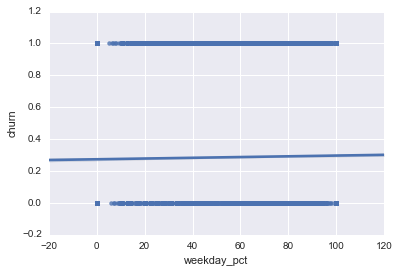

In [15]:
luxury_churn = churn[churn['luxury_True'] == True]
non_luxury_churn = churn[churn['luxury_True'] != True]

sns.regplot(luxury_churn['weekday_pct'], luxury_churn['churn'])
plt.show()
sns.regplot(non_luxury_churn['weekday_pct'], non_luxury_churn['churn'])
plt.show()

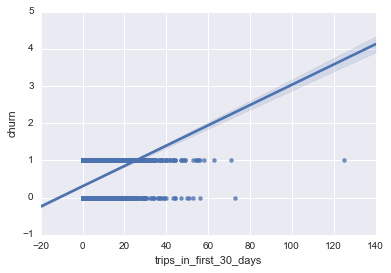

In [16]:
sns.regplot(churn['trips_in_first_30_days'], churn['churn'])

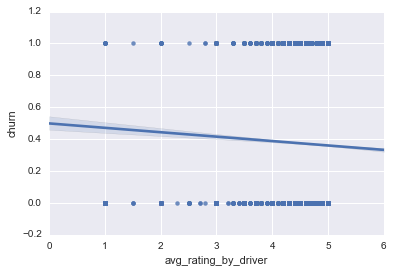

In [19]:
sns.regplot(churn['avg_rating_by_driver'], churn['churn'])

In [15]:
from sklearn.cross_validation import train_test_split

X1 = churn.drop(['churn', 'last_trip_date', 'signup_date'], axis = 1).values
y1 = churn['churn'].values

# X_intermed, X_main_test, y_intermed, y_main_test = train_test_split(X1, y1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0)

In [11]:
from xgboost import XGBClassifier

In [22]:
xbc = XGBClassifier(learning_rate=.01, n_estimators=10000)
xbc.fit(X_train, y_train)
predictions = xbc.predict_proba(X_test)

In [34]:
xbc.score(X_test, y_test)

0.8004

In [30]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_auc_score(y_test, predictions[:,1])

0.86684962799073451

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rfc.score(X_test, y_test)

0.76063999999999998

In [56]:
importances = rfc.feature_importances_

avg_dist
avg_rating_by_driver
avg_rating_of_driver
avg_surge
surge_pct
trips_in_first_30_days
weekday_pct
phone_iPhone
city_King's Landing
city_Winterfell
luxury_True


[]

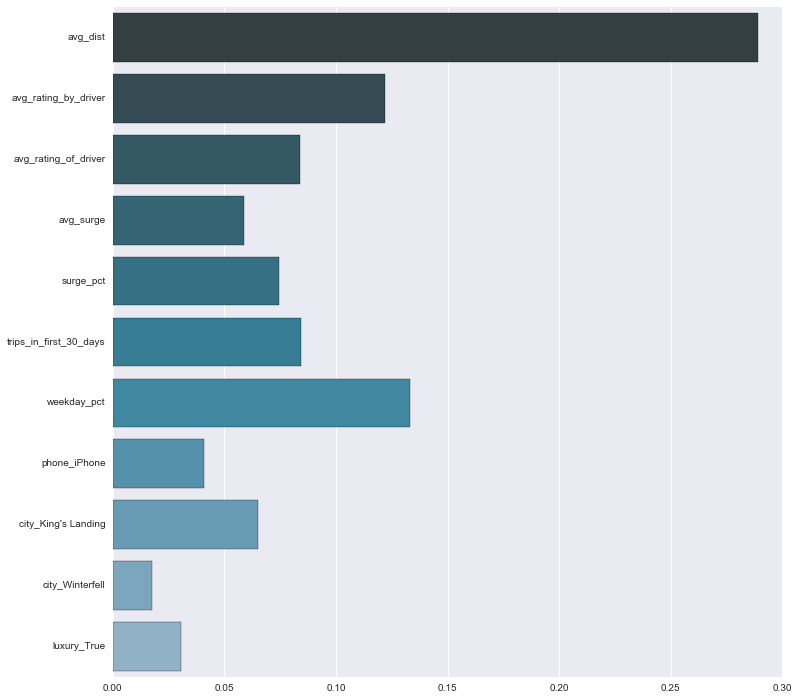

In [94]:
XXXX = xrange(len(importances))
for x in churn.drop(['churn', 'last_trip_date', 'signup_date'], axis = 1).columns:
    print x
plt.figure(figsize = (12,12))
# plt.barh(XXXX, importances)
# plt.ylabel([x for x in churn.drop(['churn', 'last_trip_date', 'signup_date'], axis = 1).columns], override = 'horizontal')
sns.barplot(y=churn.drop(['churn', 'last_trip_date', 'signup_date'], axis = 1).columns, x=importances, palette=sns.color_palette("PuBuGn_d",12))

plt.plot()

In [ ]:
len(churn)

In [ ]:
churn_kingslanding = churn[churn.city == "King's Landing"]

churn_kingslanding_iphone = churn_kingslanding[churn_kingslanding.phone == "iPhone"]
churn_kingslanding_iphone.drop(['city', 'last_trip_date', 'phone', 'signup_date'], axis=1, inplace=True)
churn_kingslanding_android = churn_kingslanding[churn_kingslanding.phone == "Android"]
churn_kingslanding_android.drop(['city', 'last_trip_date', 'phone', 'signup_date'], axis=1, inplace=True)

churn_astapor = churn[churn.city == "Astapor"]

churn_astapor_iphone = churn_astapor[churn_astapor.phone == "iPhone"]
churn_astapor_iphone.drop(['city', 'last_trip_date', 'phone', 'signup_date'], axis=1, inplace=True)
churn_astapor_android = churn_astapor[churn_astapor.phone == "Android"]
churn_astapor_android.drop(['city', 'last_trip_date', 'phone', 'signup_date'], axis=1, inplace=True)

churn_winterfell = churn[churn.city == "Winterfell"]

churn_winterfell_iphone = churn_winterfell[churn_winterfell.phone == "iPhone"]
churn_winterfell_iphone.drop(['city', 'last_trip_date', 'phone', 'signup_date'], axis=1, inplace=True)
churn_winterfell_android = churn_winterfell[churn_winterfell.phone == "Android"]
churn_winterfell_android.drop(['city', 'last_trip_date', 'phone', 'signup_date'], axis=1, inplace=True)

In [35]:
from sklearn.linear_model import LogisticRegression

In [40]:
lv = LogisticRegression(max_iter=1000, solver='sag')

In [41]:
lv.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

array([[ -3.59780215e-02,  -1.70634730e-01,  -7.35754150e-02,
         -2.42706041e-01,   4.32183076e-03,   1.20125006e-01,
          9.29756106e-04,   1.15373498e+00,   1.75466664e+00,
          5.51930872e-01,   9.01958540e-01]])